In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, f1_score, accuracy_score, precision_score, classification_report

In [2]:
import mlflow
from mlflow.tracking import MlflowClient

In [3]:
client = MlflowClient()
experiment = client.create_experiment("Titanic Survival")

In [4]:
mlflow.set_tracking_uri("http://127.0.0.1:5000")

In [5]:
mlflow.set_experiment(experiment_name="Titanic Survival")

<Experiment: artifact_location='file:///C:/Users/Cross/Downloads/learn/py/notebooks/titanic/mlruns/526526440527532153', creation_time=1697995023033, experiment_id='526526440527532153', last_update_time=1697995023033, lifecycle_stage='active', name='Titanic Survival', tags={}>

In [6]:
mlflow.autolog()

2023/10/22 22:47:09 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of sklearn. If you encounter errors during autologging, try upgrading / downgrading sklearn to a supported version, or try upgrading MLflow.

2023/10/22 22:47:10 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


In [7]:
train_data = pd.read_csv("./Titanic+Data+Set.csv")

In [8]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [10]:
train_data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [11]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 891 entries, 0 to 890

Data columns (total 12 columns):

 #   Column       Non-Null Count  Dtype  

---  ------       --------------  -----  

 0   PassengerId  891 non-null    int64  

 1   Survived     891 non-null    int64  

 2   Pclass       891 non-null    int64  

 3   Name         891 non-null    object 

 4   Sex          891 non-null    object 

 5   Age          714 non-null    float64

 6   SibSp        891 non-null    int64  

 7   Parch        891 non-null    int64  

 8   Ticket       891 non-null    object 

 9   Fare         891 non-null    float64

 10  Cabin        204 non-null    object 

 11  Embarked     889 non-null    object 

dtypes: float64(2), int64(5), object(5)

memory usage: 83.7+ KB


In [14]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [15]:
train_data.shape

(891, 12)

In [16]:
train_data['Age'].fillna(train_data['Age'].mean(),inplace=True)

In [17]:
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x22cb8beb210>,
 'caps': [<matplotlib.lines.Line2D at 0x22cb8bf4cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22cb8bea450>],
 'medians': [<matplotlib.lines.Line2D at 0x22cb8bf6550>],
 'fliers': [<matplotlib.lines.Line2D at 0x22cb8bf70d0>],
 'means': []}

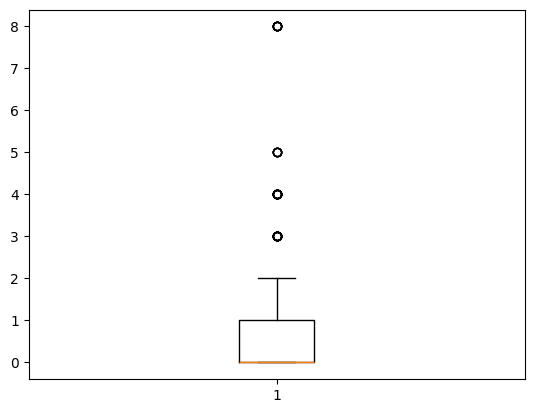

In [18]:
plt.boxplot(train_data['SibSp'],vert=True)

<Axes: xlabel='Survived', ylabel='Density'>

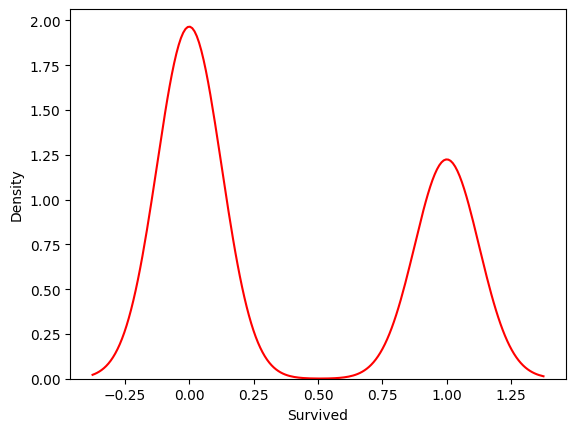

In [19]:
sns.kdeplot(train_data["Survived"],color = 'red')

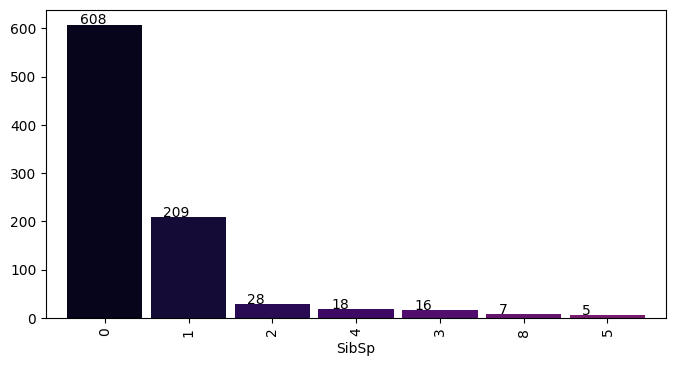

In [20]:
plt.subplots(figsize=(8,4))
ax=train_data['SibSp'].value_counts().plot.bar(width=0.9,color=sns.color_palette('inferno',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

In [21]:
train_data.drop(['Ticket', 'Cabin', 'Name', 'PassengerId'], axis=1, inplace=True)

In [22]:
train_data['Sex'] = train_data['Sex'].map({'male':0, 'female':1})
train_data['Embarked'] = train_data['Embarked'].map({'S':0, 'C': 1, 'Q': 2})

In [23]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 891 entries, 0 to 890

Data columns (total 8 columns):

 #   Column    Non-Null Count  Dtype  

---  ------    --------------  -----  

 0   Survived  891 non-null    int64  

 1   Pclass    891 non-null    int64  

 2   Sex       891 non-null    int64  

 3   Age       891 non-null    float64

 4   SibSp     891 non-null    int64  

 5   Parch     891 non-null    int64  

 6   Fare      891 non-null    float64

 7   Embarked  891 non-null    int64  

dtypes: float64(2), int64(6)

memory usage: 55.8 KB


In [24]:
X = train_data.drop(['Survived'], axis=1)
y = train_data.Survived

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=7, stratify=y)

In [31]:
rf = RandomForestClassifier(n_estimators=800, min_samples_split=6, random_state=7)

In [27]:
def model_metrics(model, train_X=X_train, val_X=X_test, train_y=y_train, val_y=y_test, show_metrics=True):
    model.fit(train_X, train_y)
    train_y_pred = model.predict(train_X)
    val_y_pred = model.predict(val_X)

    if show_metrics:
        print("val_y shape: ", val_y.shape)
        print("val_y_pred shape: ", val_y_pred.shape)
        
        print(model)
        print("Train Performance")
        print('-'*40)
        print(classification_report(train_y, train_y_pred, labels=[0, 1]))
        
        print("Test Performance")
        print('-'*40)
        print(classification_report(val_y, val_y_pred, labels=[0, 1]))
        
        print("Accuracy Score")
        print('-'*40)
        print(accuracy_score(val_y, val_y_pred))
        
        print("\nPrecision Score")
        print('-'*40)
        print(precision_score(val_y, val_y_pred, labels=[0, 1]))
        
        print("\nRecall Score")
        print('-'*40)
        print(recall_score(val_y, val_y_pred, labels=[0, 1]))
        
        print("\nF1 Score")
        print('-'*40)
        print(f1_score(val_y, val_y_pred, labels=[0, 1]))
    

In [28]:
model_metrics(rf)

2023/10/22 22:59:00 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'fedca1065f254f74ab24cf20bcd00d5d', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow

2023/10/22 22:59:00 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\Cross\Downloads\learn\py\notebooks\titanic\.venv\Lib\site-packages\mlflow\data\digest_utils.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead."

2023/10/22 22:59:00 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\Cross\Downloads\learn\py\notebooks\titanic\.venv\Lib\site-packages\mlflow\data\pandas_dataset.py:116: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a

val_y shape:  (90,)

val_y_pred shape:  (90,)

RandomForestClassifier(min_samples_split=4, n_estimators=400, random_state=7)

Train Performance

----------------------------------------

              precision    recall  f1-score   support



           0       0.96      0.98      0.97       494

           1       0.96      0.93      0.95       307



    accuracy                           0.96       801

   macro avg       0.96      0.95      0.96       801

weighted avg       0.96      0.96      0.96       801



Test Performance

----------------------------------------

              precision    recall  f1-score   support



           0       0.80      0.89      0.84        55

           1       0.79      0.66      0.72        35



    accuracy                           0.80        90

   macro avg       0.80      0.77      0.78        90

weighted avg       0.80      0.80      0.80        90



Accuracy Score

----------------------------------------

0.8



Precision Score


In [30]:
model_metrics(rf)

2023/10/22 22:59:54 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '9bb0eebc567c4e5c8924b631451737bf', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow

2023/10/22 22:59:54 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\Cross\Downloads\learn\py\notebooks\titanic\.venv\Lib\site-packages\mlflow\data\digest_utils.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead."

2023/10/22 22:59:54 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\Cross\Downloads\learn\py\notebooks\titanic\.venv\Lib\site-packages\mlflow\data\pandas_dataset.py:116: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a

val_y shape:  (90,)

val_y_pred shape:  (90,)

RandomForestClassifier(min_samples_split=4, n_estimators=400, random_state=7)

Train Performance

----------------------------------------

              precision    recall  f1-score   support



           0       0.96      0.98      0.97       494

           1       0.96      0.93      0.95       307



    accuracy                           0.96       801

   macro avg       0.96      0.95      0.96       801

weighted avg       0.96      0.96      0.96       801



Test Performance

----------------------------------------

              precision    recall  f1-score   support



           0       0.80      0.89      0.84        55

           1       0.79      0.66      0.72        35



    accuracy                           0.80        90

   macro avg       0.80      0.77      0.78        90

weighted avg       0.80      0.80      0.80        90



Accuracy Score

----------------------------------------

0.8



Precision Score


In [32]:
model_metrics(rf)

2023/10/22 23:00:50 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '0dd258af169c434ab584132dbb188e62', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow

2023/10/22 23:00:50 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\Cross\Downloads\learn\py\notebooks\titanic\.venv\Lib\site-packages\mlflow\data\digest_utils.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead."

2023/10/22 23:00:50 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\Cross\Downloads\learn\py\notebooks\titanic\.venv\Lib\site-packages\mlflow\data\pandas_dataset.py:116: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a

val_y shape:  (90,)

val_y_pred shape:  (90,)

RandomForestClassifier(min_samples_split=6, n_estimators=800, random_state=7)

Train Performance

----------------------------------------

              precision    recall  f1-score   support



           0       0.92      0.97      0.95       494

           1       0.95      0.87      0.91       307



    accuracy                           0.93       801

   macro avg       0.94      0.92      0.93       801

weighted avg       0.93      0.93      0.93       801



Test Performance

----------------------------------------

              precision    recall  f1-score   support



           0       0.82      0.89      0.85        55

           1       0.80      0.69      0.74        35



    accuracy                           0.81        90

   macro avg       0.81      0.79      0.80        90

weighted avg       0.81      0.81      0.81        90



Accuracy Score

----------------------------------------

0.8111111111111111



P

In [34]:
model_metrics(rf)

2023/10/22 23:01:21 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '386a49f098e340acb2c8413ae1447219', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow

2023/10/22 23:01:21 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\Cross\Downloads\learn\py\notebooks\titanic\.venv\Lib\site-packages\mlflow\data\digest_utils.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead."

2023/10/22 23:01:21 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\Cross\Downloads\learn\py\notebooks\titanic\.venv\Lib\site-packages\mlflow\data\pandas_dataset.py:116: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a

val_y shape:  (90,)

val_y_pred shape:  (90,)

RandomForestClassifier(min_samples_split=6, n_estimators=800, random_state=7)

Train Performance

----------------------------------------

              precision    recall  f1-score   support



           0       0.92      0.97      0.95       494

           1       0.95      0.87      0.91       307



    accuracy                           0.93       801

   macro avg       0.94      0.92      0.93       801

weighted avg       0.93      0.93      0.93       801



Test Performance

----------------------------------------

              precision    recall  f1-score   support



           0       0.82      0.89      0.85        55

           1       0.80      0.69      0.74        35



    accuracy                           0.81        90

   macro avg       0.81      0.79      0.80        90

weighted avg       0.81      0.81      0.81        90



Accuracy Score

----------------------------------------

0.8111111111111111



P